In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points 
NBA players scored in the 2013-2014 season.
A look at the data
Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information 
on how a player performed in the 2013-2014 NBA season.
Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0
Here are some selected columns from the data: player - name of the player
pos - the position of the player
g - number of games the player was in
gs - number of games the player started
pts - total points the player scored
There are many more columns in the data, mostly containing information about average player game performance 
over the course of the season. See this site for an explanation of the rest of them.

In [1]:
# Import the required modules. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import math as math

In [2]:
# Read the downloaded data into a dataframe

with open("nba_2013.csv", 'r') as csvfile: 
    nba = pd.read_csv(csvfile)

In [3]:
# Check the data is loaded. 

nba.head(2)

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013


In [4]:
# Display the columns of the dataframe. 

nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [5]:
# Display the information of the data to see if there are any nulls. 

nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [6]:
# Replace Null values with 0. 

nba_new=nba.fillna(0)
nba_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             481 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            481 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            481 non-null float64
efg.            481 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             481 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [7]:
# Copy the data into a new dataframe for processing 
nba_knn = nba_new.copy()
nba_knn.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [8]:
# Drop the columns that are not needed for the KNN processing

nba_knn.drop(columns=['player','pos','bref_team_id','season','season_end'], inplace=True)

In [9]:
# Display the remaining columns 

nba_knn.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts'],
      dtype='object')

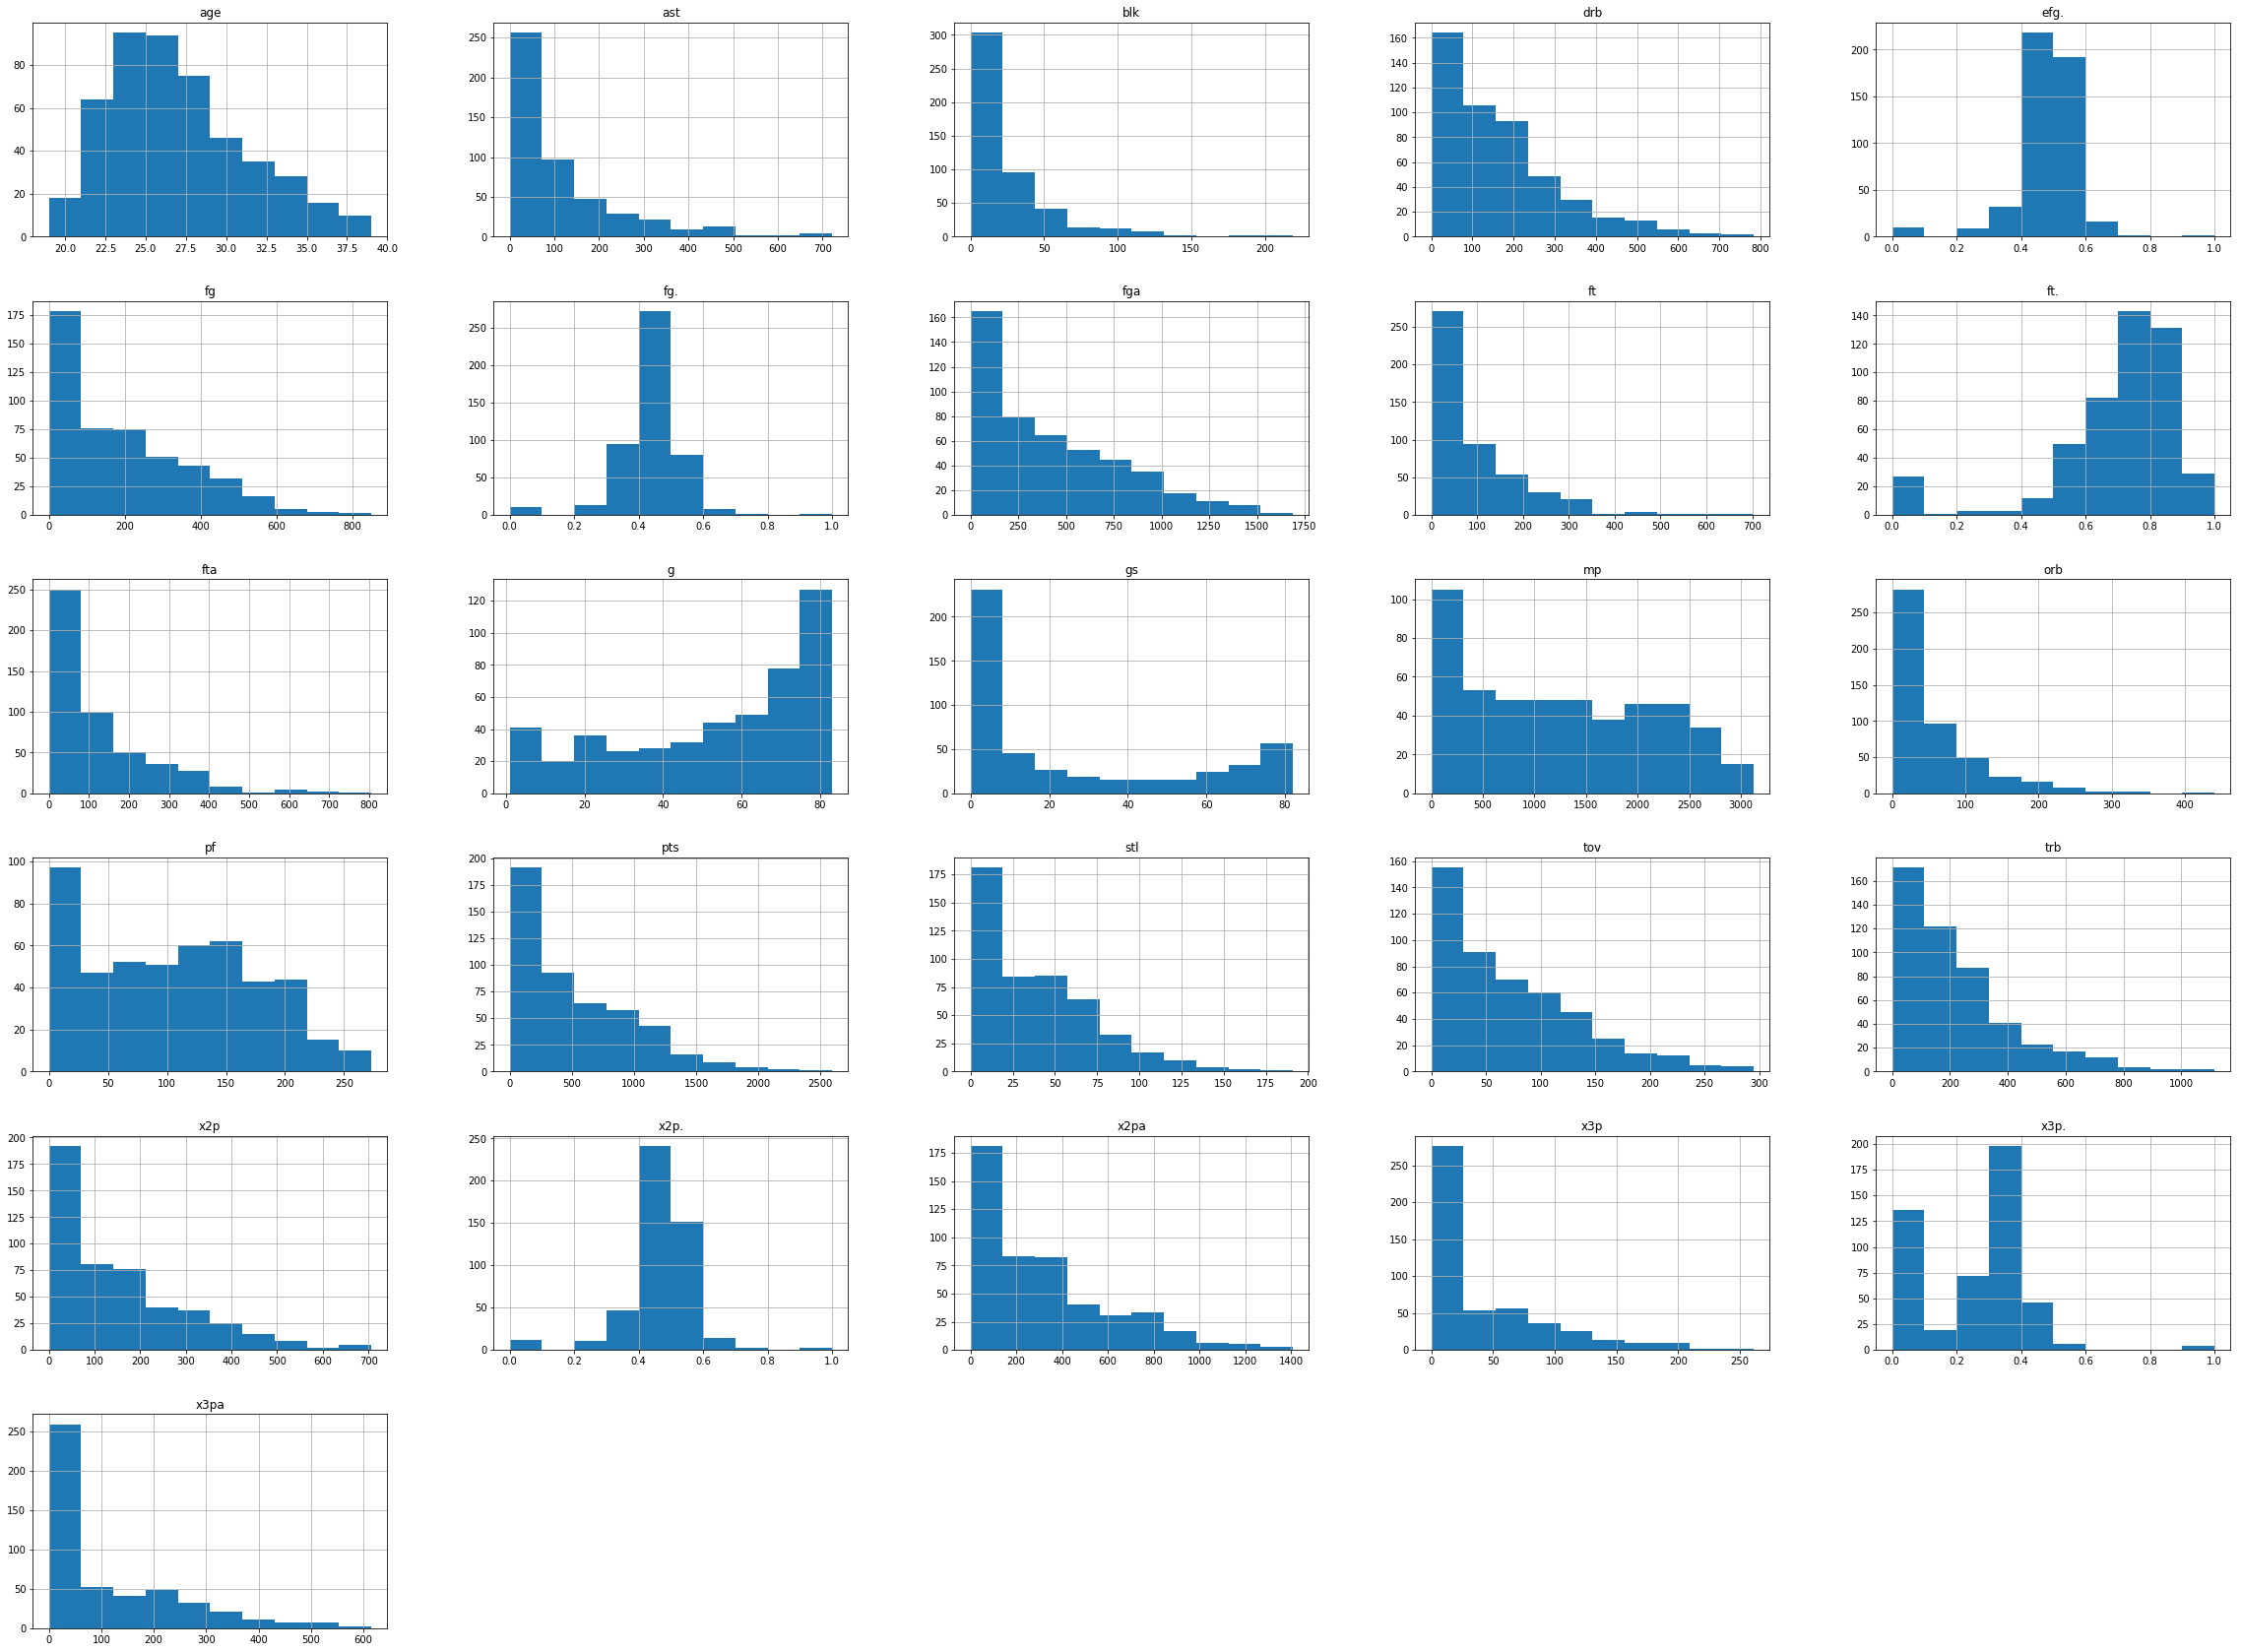

In [10]:
# Show the distribution of data in the dataframe.

nba_knn.hist(figsize=(40,30))
plt.show()

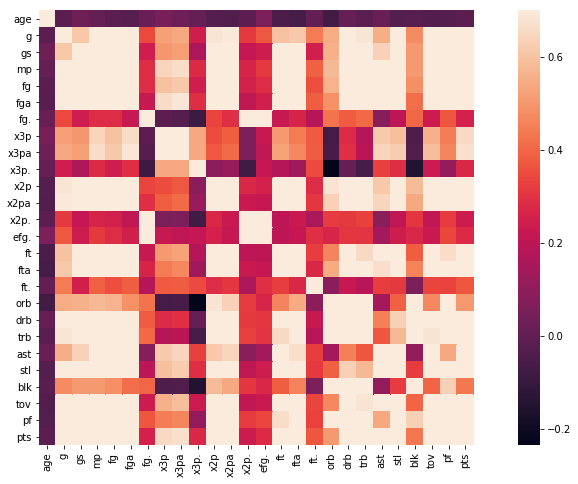

In [11]:
# Display the correlation of data 

matrix = nba_knn.corr()
f, ax = plt.subplots(figsize=(16, 8))
sns.heatmap(matrix, vmax=0.7, square=True)

In [12]:
# Check the correlation of different parameters to the points.
print(matrix['pts'])

age    -0.011910
g       0.728462
gs      0.810294
mp      0.927464
fg      0.992041
fga     0.989211
fg.     0.257634
x3p     0.655342
x3pa    0.672076
x3p.    0.272773
x2p     0.931493
x2pa    0.937036
x2p.    0.234833
efg.    0.277257
ft      0.927618
fta     0.918979
ft.     0.370515
orb     0.505524
drb     0.784675
trb     0.725930
ast     0.738295
stl     0.797449
blk     0.433549
tov     0.912724
pf      0.778060
pts     1.000000
Name: pts, dtype: float64


The above matrix values show that most of the variables are highly related to the points. 

In [13]:
# Create X for parameters for prediction and Y for the target. Target here is the points. 

X = nba_knn.copy()
Y = X.pop('pts')

In [14]:
# Show the columns in the parameter dataframe. 

X.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf'],
      dtype='object')

In [15]:
# Split Train and Test data

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state = 100)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [16]:
# Check what the optimal value of n_neighbors is for the KNN Regressor to get the best accuracy. 

for K in range(20): 
    K_value = K+1
    neigh = KNeighborsRegressor(n_neighbors = K_value, weights='distance',algorithm='auto')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    y_pred_train = neigh.predict(X_train)
    print(neigh.score(X_test, y_test))

0.9652100413179258
0.962885914819659
0.9727066194240479
0.9778292638102768
0.980290412581549
0.9840648041218106
0.983606704844287
0.984556242752942
0.9844663250454484
0.9851285033144449
0.9853393798680392
0.9849912010825697
0.9846445369133688
0.9837342639244241
0.9825387969808452
0.9826782097767097
0.9824452660464094
0.9822114504228758
0.9823708041324792
0.9829789157285502


The above scores show that n_neighbours value of 11 gives the highest accuracy. 

In [17]:
# Show the details for the model with n_neighbours as 11. 

neigh = KNeighborsRegressor(n_neighbors = 11, weights='distance',algorithm='auto')
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
print(neigh.score(X_test, y_test))
print(y_pred.round(), y_test)

0.9853393798680392
[ 581.  463.  166.  133.   26.  184.   89.   78.   10.   27.   60.  125.
   90.   18.  465. 1097.  333.  647.  479.  667.   60. 1323. 1149.  825.
    2.  535. 1064.    2.  312.  190.  749.  333.  381. 1038.  242.  365.
  773.   30.  115.  742.  536.  192.  564.  208.   39.  438.   90. 1051.
   11.  528. 1174. 1579. 1072.  665.  748. 1604.  848.    2.  627.  872.
  653.  109.  624. 1107.  302.  966. 1039. 1011. 1113.  451.   37. 1076.
  358.   49.  177. 1240.  426.  795.    3.    4.  268.  108.  198.   89.
  764.  556.  602.  513.  241.   37.  848.  188. 1287.  352. 1193.  325.
  203.] [ 511  483  178  150   38  138   99   97    6   33   73  107   99   26
  429 1068  384  665  408  703   47 1248 1257  911    0  618 1134    0
  273  273  758  252  350 1042  274  338  715   29  115  770  499  159
  495  270   27  401   75 1095   12  579 1081 1560 1069  677  646 1583
  911    0  638  921  772  143  588 1007  280 1144 1107 1068 1080  435
   44  998  303   66  174 1226  52

In [18]:
# Calculate the mean squared error

mse= mean_squared_error(y_test, y_pred, multioutput='raw_values')
print('Mean Squared Error Value of the test : ', mse)

Mean Squared Error Value of the test :  [2573.91691731]


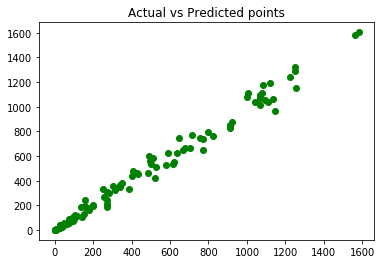

In [19]:
# Plot the actual vs the predicted values of the points. 

plt.scatter(y_test, y_pred, c='g')
plt.title("Actual vs Predicted points")
plt.show()

The accuracy of the model is 98.53% and the plot shows that the actual and predicted values are very near to each other. 